<img src="../../../thu_sigs_logo.png" alt="清华深研院-横" style="zoom:50%;" />

In [1]:
#| default_exp digital_processing_of_speech_signals.hidden_markov_model

In [6]:
#|hide
# autoreload
%load_ext autoreload
%autoreload 2
%load_ext rich

## 代码与文档格式说明

本文档使用Jupyter Notebook编写，所以同时包括了实验文档和实验代码。

本次实验项目采用了 Quarto + nbdev 的系统来发布Jupyter Notebook, 因而我们的实验文档导出为pdf和html格式可以进行阅读，而我们的代码也导出为python模块形式，可以作为代码库被其他项目使用。

我们这样做的好处是，避免单独管理一堆 .py 文件，防止代码冗余和同步混乱，py文件和pdf文件都是从.ipynb文件导出的，可以保证实验文档和代码的一致性。

### 文档阅读说明 {#sec:reading_notes}

::: {.callout-important}

本文档支持多个格式，包括ipynb, html, docx, pdf, md 等。您在阅读本文档时，可以选择您喜欢的格式来进行阅读。

但是由于本文档具有一定的交互性，我们优先建议您打开我们构建的[在线文档网站](https://thu-coursework-machine-learning-for-big-data-docs.vercel.app/) 或者 [github pages](https://open-book-studio.github.io/THU-Coursework-Machine-Learning-for-Big-Data/)进行阅读，或者使用浏览器打开作业提交的文件夹中`html`格式的文档本地打开进行阅读。

其次是建议您使用 Visual Studio Code (或者其他支持jupyter notebook的IDE, 但是VSCode阅读体验最佳) 打开 `ipynb`格式的文档来进行阅读。

VSCode或者浏览器阅读的ipynb和html文档都可以显示交互性图表、数据，这样比pdf文件阅读体验更佳。

:::

### 代码使用说明

https://github.com/Open-Book-Studio/THU-Coursework-Machine-Learning-for-Big-Data.git 是我们本次大数据机器学习课程实验的代码仓库地址。

我们的实验代码都是通过 jupyter notebook 进行编写，并通过 nbdev 进行自动化构建pypi库。
复现我们实验代码时，建议使用支持jupyter notebook的IDE（如VSCode）运行我们的 `ipynb文件`。

由于本次作业较为简单，在安装了对应依赖库后，就可以直接运行我导出的 `viterbi.py`文件。但是仍然建议使用ipynb来运行。
由于进行了一些实验探索，我们引入了
```bash
pip install fastcore
pip install jax
pip install flax
```

::: {.callout-note}

我们的代码导出为了python模块形式，如果你需要在别的项目中调用我们的代码，
可以通过以下命令安装我们实验的代码：

```shell
git clone https://github.com/Open-Book-Studio/THU-Coursework-Machine-Learning-for-Big-Data.git
cd THU-Coursework-Machine-Learning-for-Big-Data
pip install -e .
```
然后通过以下命令导入：
```python
from thu_big_data_ml.digital_processing_of_speech_signals.hidden_markov_model import *
```
:::

这次作业中，我开发的我们课题组的基础依赖库[ScholarlyInfrastructure]$https://github.com/THU-CVML/ScholarlyInfrastructure)也相应地进行了代码更新。这个库对标`fastcore`库，对AI科研经常会用到的一些基础性地、和Python语言的表达力有关的代码进行了整理，比如PyTorch模型检查、清晰的日志、实验参数管理、异常处理、argmax自动函数优化等。具体而言，本次作业中我们更新了 `scholarly_infrastructure.nbscholar` 模块，加强了代码导出同步功能。
::: {.callout-tip}

通过以下命令安装 ScholarlyInfrastructure

```shell
git clone https://github.com/THU-CVML/ScholarlyInfrastructure.git
cd ScholarlyInfrastructure
pip install -e .
```

```python
from scholarly_infrastructure import *
```

以上的代码库都已经开源在github和pypi，欢迎各位同学、老师们提出宝贵意见，或者加入我们的开发一起完善，构建更加优质的科研工具。
:::



In [7]:
from scholarly_infrastructure.logging.nucleus import logger, print
from thu_big_data_ml.help import plt, pio
import treescope

In [6]:
treescope.active_autovisualizer.set_globally(treescope.ArrayAutovisualizer())

In [3]:
#| hide 
import nbdev; nbdev.nbdev_export()

## 基本任务：查找阅读文献资料并回答问题（50分）

### 查找并阅读至少 3 篇有关 HMM 模型的参考文献资料（10 分）

> 其中：至少 1 篇为经过同行评审的正式发表的英文论文（会议或期刊均可）；不得多于 1 篇为知乎、博客、百科等非正式发表的科普性阅读资料或讲义。（10 分）

根据老师给我们的要求，我们需要找到至少 3 篇有关 HMM 模型的参考文献资料。
我们查找资料的目的是为了学习理解 HMM 模型的基本原理和应用，深入地回答老师问我们的几个问题以及我们自己的问题。

最终我选择的文献包括

- 李航的《机器学习方法》 [@LiHang_2022]
    - 这个是正式出版发表的中文书籍(教材课本)，经过了出版社编辑的评审，但是不一定是经过了论文的同行评审。
    - 这个书是机器学习领域的经典教材，数学推导较为详细，叙述较为清晰，适合深入学习。

- 老师作业文档里面建议我们阅读的 Tutorial [@Rabiner_1989]
    - 这是经过同行评审的英语论文。发表在 Proceedings of the IEEE 上。
    - 唯一作者 LAWRENCE R. RABINER 是IEEE Fellow， H-index 39。
    
- 自然语言处理方向使用到HMM的最新前沿论文，具体方向不限，我选择了 "Adaptable Logical Control for Large Language Models" [@Zhang_2024]

    - 这是一篇经过同行评审的英文论文。发表在 AI三大顶会之一的 NeurIPS 上，是2024年最新的文章。
    - 第一作者是 Zhang Honghua，五个作者都来自于UCLA。
    - 论文核心贡献在于使用HMM来实现大模型的可控输出，我觉得这是个很有意思的研究问题。

::: {.callout-important}
除了这三篇文献，我还可能在回答问题过程中引用一些其他资料或者论文，这些引用不计算在本题的三篇文献之中，只是额外的补充一些这三篇文献没有提到的一些内容提高我们的理解。所以在这三篇文献之外，我引用的维基百科有可能超过1篇；而这三篇文献本身没有百科、博客等非正式发表的科普性阅读资料，希望不会扣分。我回答问题主要是依照这三篇文献，仅在补充内容中因为文献内容不足而引入其他文献。
:::

::: {.callout-note}
关于“Proceedings of the IEEE”的一些问题。我们通过搜索引擎和AI查询，回答我们的一些问题。

- “Proceedings”是什么意思？和Transaction、Conference等词语的关系是什么？
    - "Proceedings（会议录/会议论文集）" 是指特定学术会议结束后出版的论文集合，通常包含会议中发表的论文、演讲、讨论和报告，这些论文可能未经同行评审。
        - 追问：那 Proceedings of the IEEE 是不是经过了同行评审？
        - 追问：这个英语单词明明原意是“进度”“进展”，或者“诉讼程序”，为什么在IEEE里面引申成了“会议集”，听起来好奇怪啊？
        - 追问：那么 Proceedings 到底是 会议还是期刊呢？
    - "Transactions（学报）" 是指一系列定期出版的学术期刊，它们通常包含经过严格同行评审的论文，强调期刊的连续性和系统性，常见于工程和技术领域。
        - 追问：这个英语单词原本的意思是交易，或者我们学数据库课的时候，数据库里面的“事务”，为什么也有学报的意思，英语上是怎么引申而来的？
        - 追问：经常听别的专业的人说有“清华大学学报”这种高校的学报可以发论文，但是我们计算机科学和人工智能领域我好像没见过啊，是不是对于我们这个领域来说这些学报是很水的？
    - "Conference（会议）" 是指学术会议本身，是学者们聚集在一起交流研究成果、讨论学术问题的活动，可以是国际的、国内的，或特定领域的专业会议。
        - 追问：其他学科的人为什么会认为“会议很水，比期刊弱多了”，而我们CS学科却认为“会议”才是最重要的？
    - "Workshop（研讨会/工作坊）" 是指规模较小、更加非正式的学术会议，通常专注于某个特定的研究领域或问题，强调互动和讨论，可能包括讲座、小组讨论和实践环节。
        - 追问：为什么很多师兄师姐会提到，“Workshop很水，千万别发，也不要看”？从字面意义来看似乎没有说Workshop很垃圾啊？如果我发一篇Workshop是不是毕不了业？

    - "Journal（期刊）" 是指定期出版的学术出版物，包含经过同行评审的学术论文，可以是综合性的，也可以是特定学科或领域的专业性期刊。

- “Proceedings of the IEEE”影响力如何？是不是 CCF 和 TH-CPL A类期刊会议？如果我发一篇这个，能否毕业？
    - 根据我的查询，我们发现，[CCF](https://ccf.atom.im/)和[清华分级TH-CPL](https://numbda.cs.tsinghua.edu.cn/~yuwj/TH-CPL.pdf)都一致认为，这是重要的“综合与交叉（Interdisciplinary）”A类期刊！
    - 这个结果让我震惊，因为要想发这里面的文章，似乎我只需要写Tutorial，不需要提出自己的方法达到SOTA！这是另一个赛道！
    - 而且Tutorial的影响力很大，这个期刊的年平均引用量高达46.4。

- 老师提到的语音领域相关会议、期刊有TASLP，ICASSP，INTERSPEECH。这些期刊会议是几类CCF和TH-CPL呢？如果我发这些能毕业吗？
    - 根据搜索结果，这三个分别是 CCF-B期刊, CCF-B和CCF-C会议。
    - 但是对于[清华分级TH-CPL](https://numbda.cs.tsinghua.edu.cn/~yuwj/TH-CPL.pdf)来说，TASLP升级为A类，ICASSP仍为B类，INTERSPEECH未上榜。
:::



### 以标准参考文献的格式列出所阅读的参考文献列表，并在回答以下问题时给出明确的引用。（5 分）

根据老师提供的 ICASSP 论文的要求：

> - REFERENCES: List and number all bibliographical references at the end of the paper. The 
> references can be numbered in alphabetic order or in order of appearance in the 
> document. When referring to them in the text, type the corresponding reference 
> number in square brackets as shown at the end of this sentence [2].
> 
> - The end of the document should include a list of references containing information similar 
> to the following examples (Pay attention to all format details, including but not limited to 
> authors’ name list, lower/upper-cases, punctuations, etc.):
>
>   - [1] D. E. Ingalls, "Image Processing for Experts," IEEE Transactions on Acoustics, Speech, and Signal Processing (TASSP), vol. TASSP-36, pp. 1932-1948, 1988.



论文的引用(citation)包括 in text citation  和 bibliography 。根据上面的要求，in text citation 应该是"[1]" 而非"(author, date)"的格式。而bibliography排序是按照字母顺序或者文档中出现的先后顺序。从示例来看，这很可能是 IEEE 格式，而且ICASSP是IEEE旗下的会议。

IEEE引用格式可以被`CSL` (Citation Style Language)语言形式化定义，参考文件[ieee.csl](https://github.com/citation-style-language/styles/blob/master/ieee.csl)。`CSL`语言广泛地被使用在 zotero, latex, typst 等软件系统中。

而参考文献本身一般使用 `BibLaTeX` 格式来进行记录，这一格式也已经被广泛使用。需要注意的是，`BibLaTeX` 不是 `BibTeX`格式，两者有区别，参考https://pandoc.org/MANUAL.html#citations。

本文档使用 quarto 科学文档系统进行撰写，采用的是 Pandoc Markdown 格式来在jupyter notebook中引入参考文献，参考 https://quarto.org/docs/authoring/citations.html 。quarto也支持CSL和BibLaTeX。需要注意的是，latex中`\cite`与`\ref`不同，前者是引用文献，后者是引用图表、公式、章节等。但是在 pandoc 引用格式中，这两者都是使用`@key`的方式来 in text citation，而被交叉引用的目标使用 `{#key}`  来标注。

我们在 `ipynb` 中的第一个raw block中指定了对应的 `CSL` 样式文件 `ieee.csl`，并在 `BibLaTeX` 格式的参考文献文件 `references.bib` 中，然后在正文中使用`[@citation_key1, @citation_key2]`的格式来进行In Text Citation。



如 ICASSP 的要求，我们把所有的参考文献列表放在了文末 @sec-ref-list。

::: {.callout-warning}
如果您是通过jupyter notebook而非通过文档网站阅读我们的文档 (见@sec:reading_notes的说明)，您可能无法看到自动生成的参考文献，所以我们也把刚才我们找的三篇文献以文本形式在此列出。
<!-- TODO -->
[1] 李航, 机器学习方法. <a href="https://book.douban.com/press/2562">清华大学出版社</a>    <br>                                                      <span class="pl">出版年:</span> 2022-3, 2022. Accessed: Dec. 07, 2024. [Online]. Available: https://book.douban.com/subject/35884788/

[2] L. R. Rabiner, “A tutorial on hidden Markov models and selected applications in speech recognition,” Proceedings of the IEEE, vol. 77, no. 2, pp. 257–286, Feb. 1989, doi: 10.1109/5.18626.

[3] H. Zhang, P.-N. Kung, M. Yoshida, G. V. den Broeck, and N. Peng, “Adaptable Logical Control for Large Language Models,” presented at the The Thirty-eighth Annual Conference on Neural Information Processing Systems, Nov. 2024. Accessed: Dec. 08, 2024. [Online]. Available: https://openreview.net/forum?id=58X9v92zRd&referrer=%5Bthe%20profile%20of%20Honghua%20Zhang%5D(%2Fprofile%3Fid%3D~Honghua_Zhang1)

:::


### 什么是马尔可夫过程？一阶马尔可夫过程的特点是什么？（可结合图）对一阶马尔可夫过程及一阶马尔可夫系统进行明确的形式化定义。（3 分）

#### 什么是马尔可夫过程? {#sec-markov-process}

从词语本身的定义来看，马儿可夫过程(Markov Process)是指具备了马尔科夫性质的随机过程 [@LiHang_2022]。所以要理解什么是马尔可夫过程，无非就是要理解清楚这两个子概念：马尔可夫性质和随机过程。

1. 首先什么是随机过程呢？这个我在之前的课上确实没有学过，所以我们这里认真的把这个概念梳理一下。

李航在第 19 章准备对马尔科夫链进行定义的时候，先对随机过程进行了一个较为严谨的定义 [@LiHang_2022]：

> 考虑一个随机变量的序列$X=\left \{X_0,X_1,...,X_t,...\right\}$，这里$X_t$表示时刻t的随机变量，t=0,1,2,...。每个随机变量$X_t$(t=0,1,2,...)的取值集合相同，称为状态空间，表示为S。随机变量可以是离散的，也可以是连续的。以上随机变量的序列构成**随机过程（stochastic process）**。

可以看到李航的定义的关键点在于两个，首先随机过程是随机向量(序列)构成的，其次就是这个向量里面的每一个随机变量共享一个一样的状态空间S。

李航这样定义的意思其实就是想要建模一个随时间变化分布会变化的随机变量，可能取值范围倒是不会变，毕竟还是同一个东西，像是股票的价格，天气的状态，但毕竟分布变化了，所以就不是同一个随机变量了，而是得做一列随机变量序列，叫做随机过程。

随机过程的英文也可以是 Random Process, t=0,1,2,...叫做索引集合(index set)，虽然一般index set都是时间，但是没有限制 [@Stochastic_process_2024]。相邻时间点的两个随机变量的差$X_{t+1}-X_t$ 也称为增量(increment) [@Stochastic_process_2024]。李航的定义只考虑序列，但是index set不一定是有限或者可数无穷的集合，也可以是连续的实数，后者叫做continuous-time stochastic processes，而前者叫做discrete-time stochastic processes; 如果进一步index set不仅离散而且就是整数集合或者子集，那么这个随机过程还可以叫做随机序列(random sequence) [@Stochastic_process_2024]。

刚才说的是时间是否离散，如李航定义所说，状态空间也有连续离散的问题 [@LiHang_2022]。如果状态空间离散，就叫做离散或者整值随机过程(discrete or integer-valued stochastic process)，如果状态空间连续，就叫做实值随机过程(real-valued stochastic process) [@Stochastic_process_2024]。



2. 那么什么是马尔可夫性质呢？

根据李航的定义 [@LiHang_2022]，

> 假设在时刻0的随机变量$X_0$遵循概率分布$P(X_0)=\pi_0$，称为初始状态分布。在某个时刻$t \geq 1$的随机变量$X_t$与前一个时刻的随机变量$X_{t-1}$之间有条件分布$P(X_t|X_{t-1})$；如果$X_t$只依赖于$X_{t-1}$，而不依赖于过去的随机变量$\{X_0, X_1, \cdots, X_{t-2}\}$，这一性质称为马尔可夫性，即  
>
>$$
>P(X_t|X_0, X_1, \cdots, X_{t-1}) = P(X_t|X_{t-1}), \quad t=1,2,\cdots
>$$ {#eq-markov}
>

@eq-markov 用概率语言严谨定义了马尔可夫性 (Markov property)，马尔可夫性是描述一个随机过程的，如果我事先知道或者先验地假设一个随机过程里面的概率就是有这个性质，那就是在说如果我都知道了$X_{t-1}$的具体值了，你再告诉我之前滞后的信息我认为根本没用，随机过程的内在规律都会去得到相同的 $X_t$ 分布（当然，不一定是相同值）。

马尔可夫性也被成为无记忆性 (memorylessness) [@Markov_chain_2024]。

注意马尔可夫性并不是平稳性 (stationarity) , 平稳性也是随机过程的一个性质，对于时间序列预测来说很重要 [@Stationary_process_2024], 有一定的关系但是不一样。

动态规划（Dynamic programming）中，中文社区经常提到“无后效性”，但是这个并没有对应的英文术语（我未能搜索到 no-aftereffect property），无后效性是指要求解一个第t个子问题的时候，只需要关注t之前的事情，不需要关注t之后的事情 [@无后效性]。这个性质比马尔科夫性要求要弱一些，当前问题只需要不和未来问题有关就行了，没有要求只和过去最近的1个问题有关。

英语社区中，一般会讲“最优子结构 (optimal substructure)”。这个术语是用来描述一个问题是否可以分解为子问题。这是一个比“无后效性”还要宽泛的概念，只需要问题能够分解为子问题，没有说子问题是不是重叠的，动态规划和分而治之都是解决有最优子结构的问题的算法 [@Optimal_substructure_2024]。

以上两个术语描述的是问题的求解，而我们马尔科夫性描述的对象是随机过程。当然这是很相关的，待会我们要解决隐形马尔科夫模型的一些问题的时候，就会用到动态规划。

3. 什么是马尔可夫过程？

我们继续一起阅读李航的定义 [@LiHang_2022]，

>具有马尔可夫性的随机序列$X = \{X_0, X_1, \cdots, X_t, \cdots\}$称为马尔可夫链(Markov chain)或马尔可夫过程(Markov process)。条件概率分布$P(X_t|X_{t-1})$称为马尔可夫链的转移概率分布。转移概率分布决定了马尔可夫链的特性。

原来，马尔科夫链就是马尔科夫过程。后者强调这个是一个随机过程，前者强调说马尔可夫性让这个随机过程变得像是一个链表( linked list, link是指那个指针，chain是指合在一起的东西, 像是区块链 block chain)。

也有资料指出，马尔科夫链一般是指时间离散的马尔科夫过程，最好不要用来描述连续时间的随机过程 [@馬可夫過程_2022]。



#### 什么是一阶马尔可夫过程及一阶马尔可夫系统？

刚才李航定义的马尔科夫过程其实已经是一阶马尔可夫过程了，和 [@Rabiner_1989]的定义是一样的，简单来说n阶就是和过去n个时刻的随机变量有关，而一阶就是只和过去一个时刻的随机变量有关。

李航的定义了马尔科夫过程，定义是没有问题的。M阶马儿可夫过程是额外的一个概念进行了扩充定义，也叫做具有记忆的马尔科夫链 [@Markov_chain_2024]，形式化的来说，对于一个有限的M，M阶马尔可夫过程就是满足M阶马尔可夫性质的随机过程，即

>$$
>P(X_t|X_0, X_1, \cdots, X_{t-1}) = P(X_t|X_{t-1}, X_{t-2}, \cdots, X_{t-M}), \quad t=1,2,\cdots
>$$ {#eq-markov-m}


而系统(system)和过程岁有区别，但是基本是同义词。在 Rabiner的论文 [@Rabiner_1989] 中，system拥有状态，也就是刚才说的X，系统的状态会变化。这个系统在论文中可以是 signal processing system, recognition systems等。过程可能更多是指这个系统状态变化的的过程，Rabiner并未严格区分术语 [@Rabiner_1989]。
而在刚才李航的定义中，我们可以看到，过程是由随机变量序列构成的，状态空间一样 [@LiHang_2022]，也就是说系统拥有的是状态，而过程拥有的是序列。



而在信号与系统 (Signals and Systems) 中，也有一个系统(system)，这里面是怎么定义的呢？我确实之前没有学过这个课程，于是我为了完成本次作业，学习了一下 MIT 信号与系统的公开课程 第一节，课件为 https://ocw.mit.edu/courses/6-003-signals-and-systems-fall-2011/012675925c0f652bb179b6a33cd3d13b_MIT6_003F11_lec01.pdf 。

首先，信号（signal）类似于随机过程，但是信号是一个确定性的函数，自变量是时间，因变量是电压、速度等物理量。
而一个系统 (system) 是对信号做的变换(transform)，把输入信号转换为输出信号，所以它是一个算子 (operation)，把函数变成另一个函数。

根据我的理解，对于马尔科夫链来说，如果我们说 $X_t$的密度函数 $P(X_t)$是个“输入信号”（自变量不是时间，而是状态取值），那或许我们就可以说 $P(X_t|X_{t-1})$ 可以通过概率公式 $P(X_t) = \sum_{x_{t-1}} P(X_t|X_{t-1}=x_{t-1}) P(X_{t-1}=x_{t-1})$ 来计算出 $P(X_t)$ 这个“输出信号”，那么我们就可以说 $P(X_t|X_{t-1})$ 是个“系统”。


然而，我们如果直接[谷歌搜索 "first order markov system"](https://www.google.com/search?q=first+order+markov+system&oq=first+order+markov+system&gs_lcrp=EgRlZGdlKgYIABBFGDkyBggAEEUYOTIKCAEQABiABBiiBDIKCAIQABiABBiiBDIKCAMQABiABBiiBDIKCAQQABiABBiiBDIHCAUQABjvBdIBCDUxNjFqMGoxqAIAsAIA&sourceid=chrome&ie=UTF-8), 我们会发现事实上并没有这个术语，学术圈习惯的用法应当叫做 "first-order markov chain"。我在文献[@LiHang_2022, @Rabiner_1989, @Zhang_2024] 中都并没有找到 "markov system" 这一个单词。

#### 一阶马尔可夫过程的特点是什么？请画图说明。 {#sec-first-order-markov}

总结一下上文，一阶马尔可夫过程的特点包括
1. **状态空间（State Space）相同**，也就是每一个$X_t$所有可能状态的集合都共享一个相同的集合。这是随机过程的基本定义。
2. **满足一阶马尔可夫性**，即公式 @eq-markov 所描述的性质。这是马尔可夫过程的要求。


我们把这个贝叶斯网络（Bayesian Network），又称信念网络（Belief Network） [@Zhou_2016]，通过有向无环图(Directed Acyclic Graph, DAG)表示如下：

```{mermaid}
graph LR;
    X0("X₀") -->|"P(X₁|X₀)"| X1("X₁");
    X1 -->|"P(X₂|X₁)"| X2("X₂");
    X2 -->|"P(X₃|X₂)"| X3("X₃");
    X3 -->|"P(X₄|X₃)"| X4("X₄");

```

图中的一个节点是一个随机变量，图里面的边表示随机变量之间存在依赖关系，依赖关系用参数来表示，具体来说是一个节点的所有直接父节点为条件的条件概率分布 [@Zhou_2016]。从图中我们可以看到，每一个马儿可夫过程的节点的直接依赖节点只有一个，根据贝叶斯网概率图的独立性判定的一些方法，我们看图可以知道如果$X_3$给定了，那么$X_4$就和前面的其他变量无关了，但是没有给定的时候，$X_4$与前面的状态确实是有间接关系，也就是不独立，这是因为变量的取值能影响其他变量的独立性 [@Zhou_2016]。因此，我们在图中可以很直观的看到马尔可夫性。

Rabiner 进一步提到，如果离散一阶马儿可夫过程的 $P(X_t|X_{t-1})$ 与时间无关 (independent of time)， 那么状态转移概率就是固定的一个矩阵 [@Rabiner_1989]。实际上，这种马尔可夫链也叫做时间齐次马尔可夫链 (Time-homogeneous Markov chains) [@Markov_chain_2024]。这是离散时间马尔可夫链的一种特殊情况，形式化来说是 $P(X_t|X_{t-1}) = P(X_{t+1}|X_{t})$ [@Markov_chain_2024]。 

这种情况下我们有状态概率转移矩阵, 可以用下面的概率自动机（probabilistic automaton） [@Probabilistic_automaton_2023] 来表示

```{mermaid}
graph TD;
    A[状态A] -->|0.7| B[状态B];
    A -->|0.3| C[状态C];
    B -->|0.4| A;
    B -->|0.5| C;
    B -->|0.1| D[状态D];
    C -->|0.6| A;
    C -->|0.4| D;
    D -->|0.8| B;
    D -->|0.2| C;

```

### 什么是隐马尔可夫模型？（可结合图）对隐马尔可夫模型进行明确的形式化定义。（3 分）

隐马尔可夫模型 (Hidden Markov model)，顾名思义首先是一种马尔可夫模型，和我们刚才说到的马儿可夫链一样，只是多了一个“隐”字，这个“隐”字是指我们观察不到的状态，而只能观察到的是这个状态的输出 [@Markov_model_2024]。参考下图可以看到几种不同的马儿可夫模型的区别，图源 [@Markov_model_2024]。
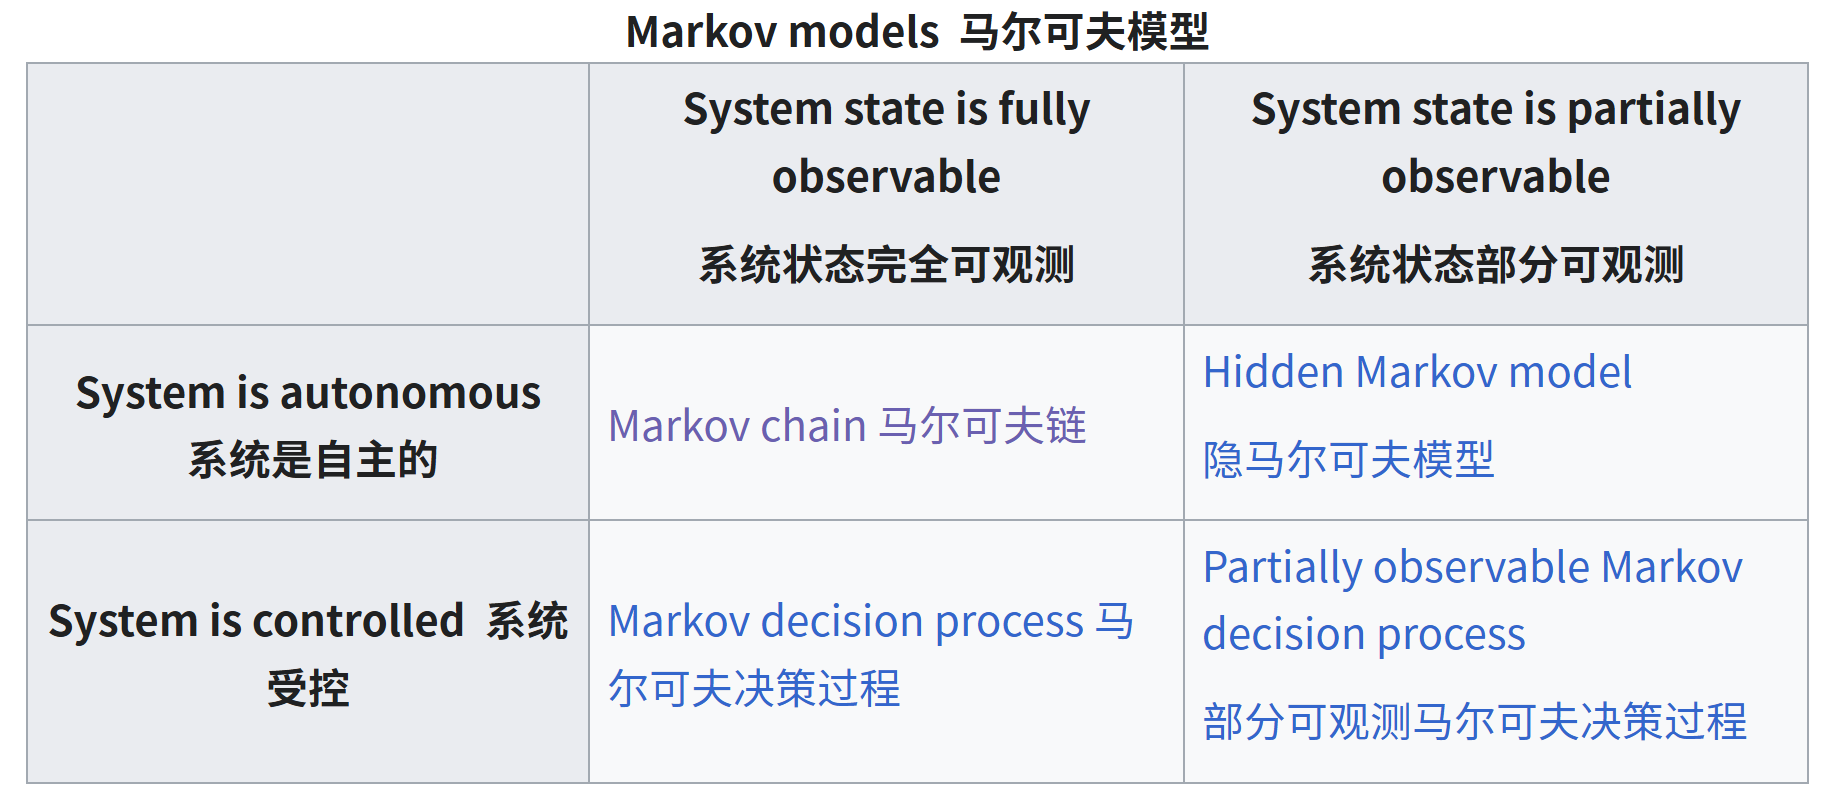

明确了分类之后，我们就可以来定义隐马尔可夫模型了。李航书第十章定义 10.1将马儿可夫模型描述如下 [@LiHang_2022]：

> 隐马尔可夫模型是关于时序的概率模型，描述由一个隐藏的马尔可夫链随机生成的不可观测的状态随机序列，再由各个状态生成一个观测从而产生观测随机序列的过程。隐藏的马尔可夫链随机生成的状态的序列称为状态序列（state sequence）；每个状态生成一个观测，而由此产生的观测的随机序列称为观测序列（observation sequence）。序列的每一个位置又可以看作是一个时刻。

其中，马尔可夫 链就是上文 @sec-markov-process 我们说的马尔可夫过程。这个马尔可夫过程的状态空间我们是知道的，也能做出一些假设，但是在具体系统中我们无法直接观测，所以说是隐藏的。而观测序列产生了一个新的随机过程，这个过程我们是可以观测到的，所以叫做观测序列。

李航上面给出的定义只是文字定义，还没有进行形式化，李航第十章进一步的形式化定义如下 [@LiHang_2022]：

> 设$Q$ 是所有可能的状态的集合，$V$ 是所有可能的观测的集合：  
> $Q=\{q_1,q_2,\cdots,q_N\},\quad V=\{v_1,v_2,\cdots,v_M\}$  
> 其中，$N$ 是可能的状态数，$M$ 是可能的观测数。
> $I$ 是长度为 $T$ 的状态序列，$O$ 是对应的观测序列：  
> $I=(i_1,i_2,\cdots,i_T),\quad O=(o_1,o_2,\cdots,o_T)$  

这里回应了我们上文说的，取值空间对于所有随机变量是一样的，所以叫做I和O都是随机过程。

> $A$ 是状态转移概率矩阵：  
> $A=[a_{ij}]_{N\times N}$ （10.1）
> 其中，  
> $a_{ij}=P(i_{t+1}=q_j|i_t=q_i)，i=1,2,\cdots,N,j=1,2,\cdots,N$ （10.2）
> 是在时刻 $t$ 处于状态 $q_i$ 的条件下在时刻 $t+1$ 转移到状态 $q_j$ 的概率。

这就是上文我们说的时间齐次马尔可夫链 (Time-homogeneous Markov chains) [@Markov_chain_2024]，可以用状态转移矩阵 $A$ 来表示条件概率。

> **B 是观测概率矩阵：**
> 
> $$
> B = [b_j(k)]_{N \times M}
> $$
> 
> 其中，
> 
> $$
> b_j(k) = P(o_t = v_k | i_t = q_j), \quad k = 1, 2, \cdots, M, \quad j = 1, 2, \cdots, N
> $$
> 是在时刻 $ t $ 处于状态 $ q_j $ 的条件下生成观测 $ v_k $ 的概率。
> 

李航指出，任意时刻的观测只依赖于该时刻的马尔可夫链的状态，与其他观测及状态无关，这个叫做观测独立性假设 [@LiHang_2022]。这里具体的依赖关系就是B这个观测概率矩阵。

> **π 是初始状态概率向量：**
> 
> $$
> \pi = (\pi_i)
> $$
> 
> 其中，
> 
> $$
> \pi_i = P(i_1 = q_i), \quad i = 1, 2, \cdots, N
> $$
> 是时刻 $ t = 1 $ 处于状态 $ q_i $ 的概率。
> 
> 隐马尔可夫模型由初始状态概率向量$\pi$、状态转移概率矩阵 A 和观测概率矩阵 B决定。$\pi$和 A决定状态序列，B决定观测序列。因此，隐马尔可夫模型$\lambda$可以用三元符号表示，即 $\lambda = (\pi, A, B)$, $A, B, \pi$ 称为隐马尔可夫模型的三要素。

李航强调了HMM模型用于机器学习的标注(Tagging)问题，隐藏状态对应的是标记 [@LiHang_2022]。

我们使用graphviz可视化一下隐马尔可夫模型作为贝叶斯网络的DAG表示：

In [ ]:
import matplotlib.pyplot as plt
import networkx as nx
from graphviz import Digraph

In [20]:
def draw_markov_chain_bayesian_network(T=4):
    # 创建一个新的有向图
    dot = Digraph(comment='Markov Chain Bayesian Network')
    
    # 为节点添加颜色属性以便区分不同类型
    state_attr = {'style': 'filled', 'fillcolor': 'lightblue'}
    observation_attr = {'style': 'filled', 'fillcolor': 'yellow'}
    
    # 添加状态节点
    for i in range(T):
        dot.node(f'I{i}', f'I_{i}', **state_attr)
    
    # 添加观察节点
    for j in range(T):
        dot.node(f'O{j}', f'O_{j}', **observation_attr)
    
    # 添加边表示状态转移
    for i in range(T-1):
        dot.edge(f'I{i}', f'I{i+1}', label='A')
    
    # 添加边表示从状态到观察的映射
    for i in range(T):
        dot.edge(f'I{i}', f'O{i}', label='B')
    
    # 渲染图形
    return dot

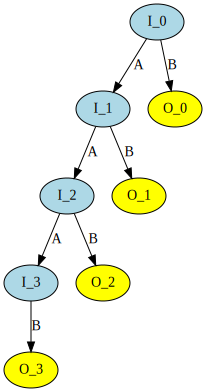

In [21]:
#| label: fig-hmm-demo
#| fig-cap: "Hidden Markov Model DAG Demonstration"
# 调用函数以绘制图表
draw_markov_chain_bayesian_network()

从图中的贝叶斯网络来看，如果给定了当前的状态 $I_t$，根据贝叶斯网络同父结构和顺序结构的原理 [@Zhou_2016]，那么 $O_t$就和其他随机变量都条件无关了。我们从图中就可以直观的感受到李航说的**观测独立性假设**。

#### 给出隐马尔可夫模型的 3 个典型问题的形式化描述。（4 分）


参考李航书第十章的内容，隐马尔可夫模型的 3 个典型问题的形式化描述如下 [@LiHang_2022]：

> (1) 概率计算问题。给定模型 $\lambda = (A, B, \pi)$ 和观测序列 $O = (o_1, o_2, ..., o_T)$，计算在模型 $\lambda$ 下观测序列 $O$ 出现的概率 $P(O|\lambda)$。
>
> (2) 学习问题。已知观测序列 $O = (o_1, o_2, ..., o_T)$，估计模型 $\lambda = (A, B, \pi)$ 参数，使得在该模型下观测序列概率 $P(O|\lambda)$ 最大，即用极大似然估计的方法估计参数。
>
> (3) 预测问题，也称为解码(decoding)问题。已知模型 $\lambda = (A, B, \pi)$ 和观测序列 $O = (o_1, o_2, ..., o_T)$，求对给定观测序列条件概率 $P(I|O)$ 最大的状态序列 $I = (i_1, i_2, ..., i_T)$。即使得给定观测序列，求最有可能对应的状态序列。


根据李航上一章EM算法的内容，(1)里面的概率也叫做不完全数据(incomplete-data)的似然函数。由于我们有$T$个时间步，还有N个和M个可能的状态和观测，所以怎么高效计算出这个似然概率也是个问题。需要使用前向后向算法, 见回答 @sec-hmm-prob 。

由于不完全数据的似然函数比起完全数据的似然函数更难进行极大似然估计，所以问题(2)也是一个很重要的问题。Baum-Welch （HMM的EM算法）就是用来解决这个问题的, 见 @sec-hmm-learn。

问题(3)则是HMM的一个重要目的，将隐藏的状态序列I解码出来。需要使用到维特比算法（Viterbi algorithm） , 见 @sec-hmm-decode。

Rabiner 的论文中同样介绍了这三个问题，但是先介绍了解码问题再介绍学习问题，其论文的符号Q就是李航的符号I [@Rabiner_1989]。Rabiner对于解码问题的定义更加宽泛一些，只是要求解码出来的状态序列"optimal in some meaningful sense" 或者 "best explains the observations", 并且Rabiner强调并没有所谓正确的一个状态序列，特别是在语音信号处理中有多种合理的最优性指标可以评价解码结果[@Rabiner_1989]。

#### 给定隐马尔可夫模型λ，如何计算该模型生成某个观察序列 O 的概率？请给出数学公式及对应的推导。（5 分）{#sec-hmm-prob}

首先我们来明确一下，这个问题是上文提到的概率计算问题，也就是说给定隐马尔可夫模型（HMM）$\lambda=(A,B,pi)$，观察序列 $O=(o_1,o_2,...,o_T)$，我们想要求模型参数生成了这个观察序列的概率 $P(O|\lambda)$。

如果我们没有对观察序列是一个可以拆开的序列的理解，只是把 O, I 当做一个整体去看，李航首先在书中给出了暴力的（概念上可行但是计算上不可行的）直接计算法 [@LiHang_2022] ，Rabiner论文叫做"straightforward way" [@Rabiner_1989]。而根据进一步的观察，可以导出这个问题的两个动态规划算法，分别是前向算法和后向算法。

::: {.callout-note}
注意，深度学习中反向传播求梯度算法与之不同，Hinton推广的反向传播算法确实也是节省计算量的算法，但是那个里面模型需要前向传播也需要反向传播，都要计算，而我们这里前向算法和后向算法是两个独立的、都可以解决问题的算法，尽管李航 [@LiHang_2022] 和 Rabiner [@Rabiner_1989] 都不恰当的合在一起命名为 "前向-后向算法"和"The Forward-Backward Procedure"，让人误解。

特别提到这个问题时因为最近Hinton又提出了所谓的 "Forward-Forward Algorithm"，这里面就是两个Forward都要做。所以我们命名方法的时候一定要精确。
::: 

##### 直接计算法及其算法复杂度

直接计算法的思路，如李航所言 [@LiHang_2022]，
> 通过列举所有可能的长为$T$的状态序列$I=(i_1,i_2,...,i_T)$，求各个状态序列$I$与观测序列$O=(o_1,o_2,...,o_T)$的联合概率$P(O,I|\lambda)$，然后对所有的状态序列求和，得到$P(O|\lambda)$。  

因为我们HMM模型参数我们知道，我们知道马尔科夫链是怎么生成概率的，所以如果latent的状态序列I我们知道，我们就可以用HMM模型天然的定义，来计算出所谓的完全数据的似然函数 $P(O,I|\lambda)$，注意这个东西里面的O和I，O是给定的一个序列，但是I是所有可能的I我们都要列举（特别注意，我们在表达这些数学符号的时候，概率是概率，函数是函数。同样一个概率，不同的场景下根据我们的目的自变量是不一样的。不完全数据的似然函数这个函数是观测序列和参数的函数，会把I优化掉，而完全数据的似然函数I也是已知观测，所以也是自变量）。这么大一个联合概率都计算出来了，我们自然就能求和得到边际分布 $P(O|\lambda)$。

具体而言，已知HMM情况下，列举出一个状态序列$I=(i_1,i_2,...,i_T)$之后，它自己的出现概率

$$P(I|\lambda)=\pi_{i_1}a_{i_1i_2}a_{i_2i_3}\cdot\cdot\cdot a_{i_{T-1}i_T}$$ 

由于知道I怎么生成O的方式，所以O的出现概率就是

$$P(O|I,\lambda)=b_{i_1}(o_1)b_{i_2}(o_2)\cdot\cdot\cdot b_{i_T}(o_T)$$

因而，$O$和$I$同时出现的联合概率为

$$P(O,I|\lambda)=P(O|I,\lambda)P(I|\lambda)=\pi_{i_1}b_{i_1}(o_1)a_{i_1i_2}b_{i_2}(o_2)\cdot\cdot\cdot a_{i_{T-1}i_T}b_{i_T}(o_T)$$ 

我们其实也可以直接列出这一个公式，通过观察上面的贝叶斯网络 @fig-hmm-demo , 我们可以直接求出这个联合概率。


最后求不完全数据的似然函数，即$P(O|\lambda)$，我们只需要对所有的状态序列求和即可。
$$P(O|\lambda)=\sum_I P(O|I,\lambda)P(I|\lambda)=\sum_{i_1,i_2,...,i_T}\pi_{i_1}b_{i_1}(o_1)a_{i_1i_2}b_{i_2}(o_2)\cdot\cdot\cdot a_{i_{T-1}i_T}b_{i_T}(o_T)$$   


之所以这个求解方式计算量大，是因为所有可能的I有 $N^T$ 个，每个状态之间排列组合上独立，所以乘在一起是指数。而对于每一个 $P(O,I|\lambda)$ ，需要做O(T)次乘法把联合概率乘出来,最后再加起来，所以总体算法复杂度 $O(N^T\times T + N^T) = O(N^T\times T)$ 。



##### 前向算法

李航 [@LiHang_2022] 和 Rabiner [@Rabiner_1989] 先给出了算法再给出解释，逻辑不太顺畅。这里我反过来先介绍背后的动机和推导，是如何给出对应算法的。

前向算法是典型的动态规划思路 （不只是维特比算法是动态规划）。
首先我求 $P(O|\lambda)$ 可以有多种加和方法，不一定是从 $P(O, I|\lambda)$ 边缘化得到的。我们可以考虑所谓的前向概率，即 $P(O_{1:t}, I_t = q_i | \lambda)$ ，其中O_{1:t}的冒号是索引表达，而P(X=x)表示随机变量X取一个值x的概率密度。 这个概率记作 $a_{t}(i)$ ，是t和i的函数, 其中 $q_i$ 表示第i个状态。

如果我求出了 $P(O_{1:T}, I_T = q_i | \lambda)$ 所有i下的情况，那我就能求出 $P(O|\lambda)$ 。

而 $P(O_{1:T}, I_T = q_i | \lambda)$ 本来也是不好求的。因为我们可以看着贝叶斯网络 @fig-hmm-demo, 可以发现我只知道 $P(O_t | I_t)$ 和 $P(I_t | I_{t-1})$ 就算你帮我减少到只有 $I_T = q_i$, $O_T$自然是和前面大家无关了, $O_{1:T}$ 这里还有 T-1个独立的rv需要遍历所有情况。

我们首先通过贝叶斯网络的观察，化简了问题为 $P(O_{1:T}, I_T = q_i | \lambda) = P(O_{1:T-1}, I_T = q_i | \lambda) \times P( O_T | I_T = q_i, \lambda) $，但是接下来$P(O_{1:T-1}, I_T = q_i | \lambda)$要怎么办呢？

这个时候，我们将问题拆解为重叠的子问题，如果我知道 $P(O_{1:T-1}, I_{T-1} = q_j | \lambda)$ 所有的j的情况呢？

想到了这个，我们恍然大悟，只需要再来一个A矩阵，就可以用求和公式和贝叶斯公式得到 $P(O_{1:T-1}, I_T = q_i | \lambda) = [\sum_{j=1}^N P(O_{1:t-1}, I_{t-1} = q_j | \lambda) \cdot a_{ji}]$ 。
<!-- TODO  -->

所以

$P(O_{1:t}, I_T = q_i | \lambda) = [\sum_{j=1}^N P(O_{1:t-1}, I_{t-1} = q_j | \lambda) \cdot a_{ji}] \times b_i(O_t)$

至此，我们就推导出了前向算法，按照李航书上的符号总结为算法步骤如下:

$$
\boxed{
\begin{aligned}
&\text{输入：隐马尔可夫模型 } \lambda, \text{ 观测序列 } O. \\
&\text{输出：观测序列概率 } P(O|\lambda). \\
&\text{(1) 初值} \\
&\alpha_1(i) = \pi_i b_i(o_1), \quad i = 1, 2, \ldots, N \quad  \\
&\text{(2) 递推} \\
&\text{对于 } t = 1, 2, \ldots, T - 1: \\
&\alpha_{t+1}(i) = \left[ \sum_{j=1}^{N} \alpha_t(j) a_{ji} \right] b_i(o_{t+1}), \quad i = 1, 2, \ldots, N \quad  \\
&\text{(3) 终止} \\
&P(O|\lambda) = \sum_{i=1}^{N} \alpha_T(i) \quad 
\end{aligned}
}
$$

前向算法运用广泛，Zhang在论文中就采用了前向算法来计算HMM的概率 [@Zhang_2024]。


##### 后向算法

后向算法的思路与前向算法基本一致，只是递推的方向反过来，最后会尝试从 i_1 去求和得到 $P(O|\lambda)$ 。前向算法是从前到后计算$\alpha_t(i)$，而后向算法是从后往前计算$\beta_t(i)$。

首先我们按照李航书上对后向概率 $\beta$ 进行定义 [@LiHang_2022]：

> $$
> \beta_t(i) = P(o_{t+1}, o_{t+2}, \cdots, o_T \mid i_t = q_i, \lambda)
> $$

也就是时刻t位于某个状态$q_i$的条件下，观测序列的后续部分的概率。

这里的关键还是递推。从时间$T-1$向前递推，计算每个时间$t$的$\beta_t(i)$。在时间$t$，如果模型处于状态$i$，那么接下来观测到$o_{t+1}$的概率取决于从状态$i$转移到所有可能的下一个状态$j$的概率$a_{ij}$，以及在状态$j$下观测到$o_{t+1}$的概率$b_j(o_{t+1})$，再乘以下一个时间点的$\beta_{t+1}(j)$。

因此，递推公式为：

$$
\beta_t(i) = \sum_{j=1}^{N} a_{ij} b_j(o_{t+1}) \beta_{t+1}(j), \quad \forall i = 1, 2, \ldots, N; \ t = T-1, T-2, \ldots, 1 \quad 
$$

整体的算法如下

$$
\boxed{
\begin{aligned}
&\text{输入：隐马尔可夫模型 } \lambda, \text{ 观测序列 } O. \\
&\text{输出：观测序列概率 } P(O|\lambda). \\
&\text{(1) 初始化} \\
&\beta_T(i) = 1, \quad \forall i = 1, 2, \ldots, N \quad  \\
&\text{(2) 递推} \\
&\text{对于 } t = T-1, T-2, \ldots, 1: \\
&\beta_t(i) = \sum_{j=1}^{N} a_{ij} b_j(o_{t+1}) \beta_{t+1}(j), \quad \forall i = 1, 2, \ldots, N \quad  \\
&\text{(3) 终止} \\
&P(O|\lambda) = \sum_{i=1}^{N} \pi_i b_i(o_1) \beta_1(i) \quad 
\end{aligned}
}
$$




#### 给定隐马尔可夫模型λ、以及对应的观察序列 O，如何得到该模型产生该观察序列的最优隐含状态的序列 Q？请给出数学公式及对应的推导。（5 分） {#sec-hmm-decode}

首先我们明确一下，这个问题时预测问题或者解码(decoding)问题 [@LiHang_2022]。
> 已知模型 $\lambda = (A, B, \pi)$ 和观测序列 $O = (o_1, o_2, ..., o_T)$，求对给定观测序列条件概率 $P(I|O)$ 最大的状态序列 $I = (i_1, i_2, ..., i_T)$。即使得给定观测序列，求最有可能对应的状态序列。

需要注意的是李航书的定义在这里出现了不一致，他文字说的是 $P(I|O, \lambda)$， 却问我们 $P(I|O)$。我们再对照一下Rabiner的论文，就能发现是李航书编辑不严谨，$P(I|O, \lambda)$ 才是正确的"single best state sequence"方法 [@Rabiner_1989]。

但是 $P(I|O)$ 的确也是一个引人深思的问题，如果我们连模型参数都不知道，先用EM算法估计出参数再采纳解码问题的算法自然是不错，但是是最优的吗？由于Rabiner和李航都没有讨论这个问题，我虽然觉得这个问题很有意思，但是不在这里展开讨论。
<!-- TODO -->


针对$P(I|O, \lambda)$的问题，李航的书上首先给出了近似算法，然后再给出维特比算法 [@LiHang_2022]。

##### 近似算法

所谓近似算法，就是在观察到数据O和模型 $\lambda$, 每个时刻t独立地选择最优的 $i_t$，独立的进行极大概率估计，而不考虑 $i_t$和其他 $i_{\prime{t}}$ 的关系。优化目标原本是  $P(I|O, \lambda)$， 也就是整个I作为一个随机变量序列（构成随机过程）的概率，现在我们把它独立了。

给定HMM参数和观测序列O，t时刻处于状态$q_i$的概率记作 $\gamma_t(i) = P(i_t = q_i | O, \lambda)$

$$
\gamma_t(i) = \frac{\alpha_t(i) \cdot \beta_t(i)}{P(O|\lambda)} = \frac{\alpha_t(i) \cdot \beta_t(i)}{\sum_{j=1}^N \alpha_t(j) \cdot \beta_t(j)}
$$

寻找每一个t的 ${i_t}^{*} = \operatorname{argmax}_{i} \gamma_t(i)$，即找到使得$\gamma_t(i)$最大的$i$。

李航坚定不移地认为这个问题的最优就是让 $P(I|O, \lambda)$ 最大，而近似算法是对这个问题的近似。而Rabiner的论文则不是这样的观点，Rabiner也给出了 "choose the states g, which are individually most likely."，但是认为这本身是另外一个"optimality criterion" [@Rabiner_1989]。

Rabiner 进一步指出，近似算法会导致不少问题，比如说相邻两个状态的转移概率根本就是0，但是近似算法仍然会给出这两个状态，因为都是局部最优的，导致得到了非法的状态序列。

##### 维特比算法

维特比算法（Viterbi algorithm）是一种动态规划算法，用于求解最优路径问题。

首先，是初始化部分。在 t=1 时，应该计算每个状态的概率。我的理解是，初始概率 $\delta_1(i)$ 应该是初始状态概率 $\pi_i$ 乘以观测到 $o_1$ 的概率 $b_i(o_1)$。

于是
$$
\delta_{1}(i) = \pi_{i} b_{i}(o_{1}), \quad i=1,2,...,N
$$
同时，考虑到回溯路径的需求，还需要一个变量记录前一状态的最优路径来源。这里需要定义一个Psi函数 $\Psi_t(i)$。

$$
\Psi_{1}(i) = 0, \quad i=1,2,...,N
$$
因为在 t=1 时，没有前一状态，所以直接设为0。

接下来是递推部分。对于每一个时间点 $t = 2,3,...,T$，需要更新 $\delta_t(i)$ 和 $\Psi_t(i)$。

$\delta_t(i)$ 应该是通过之前的时间点的最大概率转移过来的，所以应该是：
$$
\delta_{t}(i) = \max_{1 \leq j \leq N} [\delta_{t-1}(j) a_{ji}] b_{i}(o_{t}), \quad i=1,2,...,N
$$
这里 $a_{ji}$ 是从状态 $j$ 到状态 $i$ 的转移概率。

然后，Psi函数 $\Psi_t(i)$ 是记录达到当前最优 $\delta_t(i)$ 时的前一状态，所以是：
$$
\Psi_{t}(i) = \arg \max_{1 \leq j \leq N} [\delta_{t-1}(j) a_{ji}], \quad i=1,2,...,N
$$
这样在最后可以回溯出最优路径。

最后终止部分，我们需要找到整个序列的最优概率和对应的最后一个状态。最优概率 $P^*$ 应该是最后一个时间点所有状态中的最大 $\delta_T(i)$：
$$
P^{*} = \max_{1 \leq i \leq N} \delta_{T}(i)
$$
而对应的最优状态 $i_T^*$ 则是：
$$
i_T^* = \arg \max_{1 \leq i \leq N} [\delta_T(i)]
$$
接下来是最优路径的回溯。从最后一个状态 $i_T^*$ 开始，向前找到每一个 $i_t^*$：
$$
i_t^* = \Psi_{t+1}(i_{t+1}^*), \quad t = T-1, T-2, ..., 1
$$
这样就可以构建出整个最优路径 $I^* = (i_1^*, i_2^*, ..., i_T^*)$。

整体算法总结如下 [@LiHang_2022]：

$$
\boxed{
\begin{aligned}
&\text{维特比算法(Viterbi algorithm)} \\
&\text{输入：模型 } \lambda = (A,B,\pi) \text{ 和观测 } O=(o_1,o_2,...,o_T). \\
&\text{输出：最优路径 } I^*=(i_1^*,i_2^*,...,i_T^*). \\
&\text{（1）初始化。} \\
&\quad \delta _{1}(i)=\pi_{i}b_{i}(o_{1}), \quad i=1,2,...,N \\
&\quad \Psi _{1}(i)=0, \quad i=1,2,...,N \\
&\text{（2）递推。对 } t=2,3,...,T, \\
&\quad \delta _{t}(i)=\max_{1 \leq j \leq N}[\delta _{t-1}(j)a_{ji}]b_{i}(o_{t}), \quad i=1,2,...,N \\
&\quad \Psi _{t}(i) =\arg \max_{1 \leq j \leq N}[\delta _{t-1}(j)a_{ji}], \quad i=1,2,...,N \\
&\text{（3）终止。} \\
&\quad P^{*}=\max_{1 \leq i \leq N}\delta _{T}(i) \\
&\quad i_T^*=\arg \max_{1 \leq i \leq N}[\delta _T(i)] \\
&\text{（4）最优路径回溯。对 } t=T-1,T-2,...,1， \\
&\quad i_t^*=\Psi_{t+1}(i_{t+1}^*) \\
&\quad \text{求得最优路径 } I^*=(i_1^*,i_2^*,...,i_T^*).
\end{aligned}
}
$$


#### 给你一堆观察数据 O1,O2,…,ON，并假设这些观察数据符合隐马尔可夫过程的假设，如何估计出一个最优的隐马尔可夫模型λ，该模型产生这些观察数据的概率最优。（5 分）{#sec-hmm-learn}

首先我们明确一下，这个问题是上文提到的学习问题 [@LiHang_2022]。

> 已知观测序列 $O = (o_1, o_2, ..., o_T)$，估计模型 $\lambda = (A, B, \pi)$ 参数，使得在该模型下观测序列概率 $P(O|\lambda)$ 最大，即用极大似然估计的方法估计参数。

李航指出，学习算法分为两种，有监督学习和无监督学习 [@LiHang_2022]。如果我们有训练数据的标注，告诉我们S个长度相同的观测序列和对应的状态序列作为训练数据集，我们就可以用极大似然估计的方法来估计参数，因为我们具有多个完全数据，可以轻而易举的估计出似然函数。

根据李航的描述，具体的估计方法包括三个步骤，分别是针对三个参数。

> 1. 转移概率$a_{ij}$的估计  
> 设样本中时刻$t$处于状态$i$而时刻$t+1$转移到状态$j$的频数为$A_{ij}$，那么状态转移概率$a_{ij}$的估计是  
> $\hat{a}_{ij}=\frac{A_{ij}}{\sum_{j=1}^{N}A_{ij}},\quad i=1,2,\cdots,N,\quad j=1,2,\cdots,N$ 
> 2. 观测概率$b_j(k)$的估计  
> 设样本中状态为$j$并观测为$k$的频数是$B_{jk}$，那么状态为$j$、观测为$k$的概率$b_j(k)$的估计是  
> $\hat{b}_j(k)=\frac{B_{jk}}{\sum_{k=1}^{M}B_{jk}},\quad j=1,2,\cdots,N,\quad k=1,2,\cdots,M$ 
> 3. 初始状态概率$\pi_i$的估计
> $\hat{\pi}_i$为$S$个样本中初始状态为$q_i$的频率  



如果我们没有完全数据，但是有S个知道观测序列的样本，我们可以用 Baum-Welch 算法估计模型参数。李航指出，Baum-Welch 算法本质上就是一种EM算法 [@LiHang_2022]。

期望最大值（EM）算法是一种迭代算法，因为原本的极大似然估计问题没有解析解。对于HMM，算法的输入是观测序列 $O = (o_1, o_2, \ldots, o_T)$，输出是模型参数 $\lambda = (A, B, \pi)$。这个算法主要有三个步骤：初始化、迭代更新参数、终止。


首先需要对参数进行初始化。对于隐马尔可夫模型，需要初始化状态转移矩阵 $A$、观测概率矩阵 $B$ 和初始状态概率向量 $\pi$。这里会有一定的规则。

接下来我们就要考虑如何递推更新参数，包括求期望的步骤和最大化的步骤。在迭代更新到一定次数或者参数收敛时，停止迭代，得到最终的模型参数。

完整算法如下 [@LiHang_2022]：

$$
\boxed{
\begin{aligned}
&\text{Baum-Welch算法} \\
&\text{输入: 观察数据 } O = (o_1, o_2, \ldots, o_T). \\
&\text{输出: 隐马尔可夫模型参数。} \\
&\text{(1) 初始化。对 } n=0, \text{选取 } a_{ij}^{(0)}, b_j(k)^{(0)}, \pi_i^{(0)}, \text{得到模型 } \lambda^{(0)} = (A^{(0)}, B^{(0)}, \pi^{(0)}). \\
&\text{(2) 递推。对 } n=1,2,\ldots, \\
&\quad a_{ij}^{(n+1)} = \frac{\sum_{t=1}^{T-1} \xi_t(i,j)}{\sum_{t=1}^{T-1} \gamma_t(i)}, \\
&\quad b_j(k)^{(n+1)} = \frac{\sum_{t=1, o_t = v_k}^{T} \gamma_t(j)}{\sum_{t=1}^{T} \gamma_t(j)}, \\
&\quad \pi_i^{(n+1)} = \gamma_1(i). \\
&\quad \text{右端各值按观测 } O = (o_1, o_2, \ldots, o_T) \text{ 和模型 } \lambda^{(n)} = (A^{(n)}, B^{(n)}, \pi^{(n)}) \text{ 计算。} \\
&\quad  \\
&\text{(3) 终止。得到模型参数 } \lambda^{(n+1)} = (A^{(n+1)}, B^{(n+1)}, \pi^{(n+1)}).
\end{aligned}
}
$$


#### 什么是高斯混合模型？高斯混合模型如何与隐马尔可夫模型结合？（5 分）

##### 什么是高斯混合模型？

高斯混合模型（Gaussian Mixture Model，GMM）是一种概率模型，它假设数据由一组高斯分布混合而成，每个高斯分布都有一个均值和协方差。这里所谓模型是指对与数据分布的假设，假设数据的分布是满足高斯混合的性质的。根据李航书，我们可以形式化定义GMM:



> 高斯混合模型是指具有如下形式的概率分布模型：
>
> $P(y|\theta) = \sum_{k=1}^{K} \alpha_k \phi(y|\theta_k)$
>
> 其中，$\alpha_k$ 是系数，$\alpha_k \geq 0$，$\sum_{k=1}^{K} \alpha_k = 1$；$\phi(y|\theta_k)$ 是高斯分布密度，$\theta_k = (\mu_k, \sigma_k^2)$，
>
> $\phi(y|\theta_k) = \frac{1}{\sqrt{2\pi}\sigma_k} \exp\left[-\frac{(y-\mu_k)^2}{2\sigma_k^2}\right]$
>
> 称为第 $k$ 个分模型。

李航还提到了一般混合模型，也就是说分布不一定是高斯分布，可以是其他分布，但是高斯混合模型是最常用的混合模型 [@LiHang_2022]。

而具体来说给定一个数据，GMM关注的问题就是如何从数据反过来估计GMM自己的模型参数。由于我们不知道每一个数据是来自于哪个高斯分布，所以我们我们不知道完全数据，而不完全数据的似然函数无法得到一个解析解 [@LiHang_2022]。这里自然还是使用了EM算法，类似于上文我们提到的EM算法求解马儿可夫过程的参数估计/学习问题。

具体算法如下：

$$
\boxed{
\begin{aligned}
&\text{算法9.2（高斯混合模型参数估计的EM算法）} \\
&\text{输入：观测数据 } y_{1}, y_{2}, \ldots, y_{N}, \text{高斯混合模型。} \\
&\text{输出：高斯混合模型参数。} \\
&\text{（1）取参数的初始值开始迭代。} \\
&\text{（2）E步：依据当前模型参数，计算分模型 } k \text{ 对观测数据 } y_{j} \text{ 的响应度。} \\
&\quad \hat{\gamma}_{jk} = \frac{\alpha_{k} \phi(y_{j}|\theta_{k})}{\sum_{k=1}^{K} \alpha_{k} \phi(y_{j}|\theta_{k})}, \quad j=1,2,\ldots,N; \, k=1,2,\ldots,K. \\
&\text{（3）M步：计算新一轮迭代的模型参数。} \\
&\quad \mu_{k} = \frac{\sum_{j=1}^{N} \hat{\gamma}_{jk} y_{j}}{\sum_{j=1}^{N} \hat{\gamma}_{jk}}, \quad k=1,2,\ldots,K. \\
&\quad \hat{\sigma}_{k}^{2} = \frac{\sum_{j=1}^{N} \hat{\gamma}_{jk} (y_{j} - \mu_{k})^{2}}{\sum_{j=1}^{N} \hat{\gamma}_{jk}}, \quad k=1,2,\ldots,K. \\
&\quad \hat{\alpha}_{k} = \frac{\sum_{j=1}^{N} \hat{\gamma}_{jk}}{N}, \quad k=1,2,\ldots,K. \\
&\text{（4）重复第2步和第3步，直到收敛。}
\end{aligned}
}
$$






##### 高斯混合模型如何与隐马尔可夫模型结合？

本来高斯混合模型GMM和隐马尔可夫模型HMM是两个独立的模型，只不过有latent变量的模型，都是可以用EM算法来求解。但是在具体的任务场景下，GMM和HMM也可以进行结合，联合完成任务。这种结合形成了所谓的高斯混合隐马尔可夫模型（GMM-HMM），它能够有效地捕捉和分析复杂的数据分布，通常用处理于连续时间序列数据，尤其是在语音识别、动作识别和车辆轨迹预测等领域。

具体来说是怎么结合的呢？比如在人体动作识别的运用当中，高斯混合模型被用作隐马尔可夫模型的观测概率分布，每个动作被视为符合高斯混合分布的样本，每个样本由一个状态来决定变量 [@Xu_Luo_2021]。

有学者认为，这种结合允许模型更好地表达数据的分布特性，并通过隐马尔可夫链的时间依赖性来捕捉数据中的动态变化 [@Liu_Wang_2017]。

#### 请结合相关文献，介绍一个隐马尔可夫模型在语音及自然语言处理领域的最新应用实例，包括但不限于语音识别、语音合成、文本分词等。注意需要解释清楚模型是如何应用到实际任务中的，以及是否存在方法上的改进。（5 分）

我选择了自然语言处理方向使用到HMM的最新前沿论文"Adaptable Logical Control for Large Language Models" [@Zhang_2024]，具体方向为大型语言模型的可控输出。这是一篇经过同行评审的英文论文。发表在 AI三大顶会之一的 NeurIPS 上，是2024年最新的文章。第一作者是 Zhang Honghua，五个作者都来自于UCLA。

1. 首先我们来描述一下这篇论文要解决什么问题，问题的背景是什么？

这篇文章提出了 Ctrl-G 这个方法，这个方法作者也说它是一种神经符号主义(neuro-symbolic)的框架。（就是既要用神经网络认知模型，也要用符号逻辑做逻辑约束。）方法的目的是用于可靠地控制大型语言模型（LLM）的生成，使其符合逻辑约束。具体而言，LLM可以是任何的别人预训练好的LLM，而逻辑约束是用确定性有穷自动机（DFA）来表示的（还记得吗？我们上文 @sec-first-order-markov 介绍了时间齐次马尔可夫链与概率自动机的关系）。具体解决这个问题时，Ctrl-G 结合了 LLM 和隐马尔可夫模型（HMM）。

这篇论文的实验是针对LLM的可控生成任务的基准测试(constrained generation benchmarks)上去做的，具体包括常识生成（Commonsense Generation），文本填充（Text Infilling），以及交互式的文本编辑（Interactive Text Editing）。实验表明，Ctrl-G 在文本编辑任务中优于 GPT-4，并在 Commonsense Generation 和文本填充基准测试中取得了优异的成绩。此外，Ctrl-G 还可以应用于更广泛的任务，例如提高 LLM 逻辑推理的能力。


2. 在这篇论文中，HMM 模型具体是如何应用到LLM的逻辑约束控制生成任务当中的？

参考论文的流程图 [@Zhang_2024]

<img src="image.png" alt="流程图" style="width: 30%; height: auto;">

Ctrl-G 包括三个步骤：蒸馏(distillation)、约束指定(constraint specification)和推理时引导(inference-time guidance)。

首先在蒸馏步骤，作者认为LLM是黑盒模型，而HMM是白盒模型，相对透明很多。给定一个LLM，作者直接训练一个HMM来近似这个LLM的分布。这个步骤是通过最小化LLM和HMM之间的KL散度来实现的，即通过训练样本来调整HMM的参数，使其尽可能地模仿LLM的行为。这个过程结束后，HMM充当了LLM的一个简化模型，可以更高效地进行推理和控制。

接着，作者构建一个确定性有限自动机（DFA）来紧凑地表示所需的逻辑约束。DFA是一种计算模型，能够接受或拒绝给定的字符串，这里用来确保生成的文本满足特定的逻辑约束。

在LLM的自回归生成过程中，研究者们计算HMM在DFA指定的约束下的条件概率，并使用这个条件概率来引导LLM生成满足约束的文本。具体来说，对于每一步的生成，都会计算在当前约束下下一个词的概率，并从这个概率分布中采样下一个词。

Ctrl-G的一个主要优势是它能够保证逻辑约束被满足，并且由于HMM的参数数量相对于LLM来说较少，它在推理时更加高效。此外，HMM的白盒特性使得它可以被泛化到不同的LLM和各种逻辑约束上。

3. 文中使用的HMM算法是否是HMM的改进版（*是否存在方法上的改进*），还是直接使用了原版的HMM(Vanilla HMM)?

Ctrl-G 中使用的 HMM 的概率计算方法正是直接使用到了我们上文 @sec-hmm-prob 提到的前向算法。

然而从大模型蒸馏学习HMM的算法并不是我们这里学习的普通的EM算法，而是作者自己的上一篇ICML 2023论文 [@Zhang_2023]提出的算法，这篇论文的算法也是使用了EM算法，但是具体来说HMM被当做是probabilistic circuits，使用Juice.jl 框架来学习 [@Dang_2021]，而训练过程采用了latent variable distillation technique [@Liu_2022] 提高速度，最后得到一个2-B的HMM。

此外，Ctrl-G 还提供了一种高效的算法来计算 HMM 在 DFA 上的边缘概率，确保推理过程的效率。

具体细节较多，篇幅有限我们这里不展开。

## 实验任务一：Viterbi 解码算法实现（20 分）

助教的代码是在 https://github.com/thuhcsi/dpss-exp2-HMM/blob/master/T1-Viterbi-Decoding/viterbi.py 。

我们基于 `nbdev`库，在jupyter notebook中及时对代码进行测试和文档编写。我们接下来逐步完成助教代码中的要求的几个部分。我们使用 `fastcore`的`patch`来让Python的面向对象支持 Mixin风格，从而可以方便地扩展类。


In [23]:
#| exports
from fastcore.all import patch

此外，助教的代码不支持学习A和B矩阵，所以我们进一步探索，修改了助教的代码，使用Google的先进的深度学习框架`jax`+`flax`，来让HMM模型支持GPU运算和自动微分。jax 是 谷歌提出的新一代框架，结合了 NumPy 的接口和自动微分功能，以及强大的编译优化，据一些研究指出具有较好的性能。
```python
pip install -U "jax[cuda12]"
pip install flax
pip install treescope
```

注意，根据 https://github.com/google/flax , flax 有两套不同的API，一套是 `from flax import linen`, 一套是 `from flax import nnx`。
> Released in 2024, Flax NNX is a new simplified Flax API that is designed to make it easier to create, inspect, debug, and analyze neural networks in JAX. Flax NNX evolved from the Flax Linen API, which was released in 2020 by engineers and researchers at Google Brain in close collaboration with the JAX team.

后者与PyTorch更加接近，是flax的最新设计，我们决定使用后者。

In [1]:
#| exports
import jax.numpy as jnp
from flax import nnx # 导入 nnx 库，里面包含了一些常用的网络层
from fastcore.all import store_attr # 导入 fastcore 基础库的 store_attr 函数，用来方便地存储类的属性，这样Python面向对象写起来不那么冗长。 请 pip install fastcore。
from typing import Any

In [2]:
#| exports
class HiddenMarkovModel(nnx.Module):
    """Hidden Markov Model

    HMM with 3 states and 2 observation categories.

    Attributes:
        ob_category (list, with length 2): observation categories
        total_states (int): number of states, default=3
        pi (array, with shape (3,)): initial state probability
        A (array, with shape (3, 3)): transition probability. A.sum(axis=1) must be all ones.
                                      A[i, j] means transition prob from state i to state j.
                                      A.T[i, j] means transition prob from state j to state i.
        B (array, with shape (3, 2)): emitting probability, B.sum(axis=1) must be all ones.
                                      B[i, k] means emitting prob from state i to observation k.

    """

    def __init__(self):
        self.ob_category = ['THU', 'PKU']  # 0: THU, 1: PKU
        self.total_states = 3
        self.pi = nnx.Param(jnp.array([0.2, 0.4, 0.4]))
        self.A = nnx.Param(jnp.array([[0.1, 0.6, 0.3],
                           [0.3, 0.5, 0.2],
                           [0.7, 0.2, 0.1]]))
        self.B = nnx.Param(jnp.array([[0.5, 0.5],
                           [0.4, 0.6],
                           [0.7, 0.3]]))
pass

<!-- # TODO supress nbdev_show_doc exports -->
<!-- from nbdev.showdoc import *
<!--  -->

定义好模型之后，我们这就初始化一下模型，并且可以对模型进行可视化，看到参数的情况。

In [35]:
model = HiddenMarkovModel()
nnx.display(model)

<IPython.core.display.HTML object>

<IPython.core.display.HTML object>

我们把测试数据（观测序列O）也定义好。

In [47]:
observations = jnp.array([0, 1, 0, 1, 1])  # [THU, PKU, THU, PKU, PKU]

### 前向算法 （7 分）

现在我们来实现前向算法，为了避免和 `PyTorch` 里面的前向传播反向传播混淆，我们换个名字叫做`compute_likelihood_by_forward`，更加贴近本质，不仅是告诉用户我们算法的名字，还要告诉用户这个接口的目的。forward只是手段，不是目的，目的是似然概率。

In [49]:
#| exports
@patch
def compute_likelihood_by_forward(self: HiddenMarkovModel, ob):
    """HMM Forward Algorithm.

    Args:
        ob (array, with shape(T,)): (o1, o2, ..., oT), observations

    Returns:
        fwd (array, with shape(T, 3)): fwd[t, s] means full-path forward probability torwards state s at
                                        timestep t given the observation ob[0:t+1].
                                        给定观察ob[0:t+1]情况下t时刻到达状态s的所有可能路径的概率和
        prob: the probability of HMM model generating observations.

    """
    T = ob.shape[0]
    fwd = jnp.zeros((T, self.total_states))

    # Begin Assignment

    # 初始化 t=0 时刻的前向概率
    # fwd[0, :] = self.pi * self.B[:, ob[0]] # jax 不支持 in place 复制
    fwd = fwd.at[0, :].set(self.pi * self.B[:, ob[0]])

    # 根据前向概率的递推公式计算 t=1 到 T 时刻的前向概率
    for t in range(1, T):
        for j in range(self.total_states):
            fwd = fwd.at[t, j].set(self.B[j, ob[t]] * jnp.dot(fwd[t - 1, :], self.A[:, j]))
            
    # End Assignment

    prob = fwd[-1, :].sum()

    return fwd, prob

上面编程中要注意 jax 有一处使用和numpy不同，即对in place 操作的支持有所不同，参考 https://jax.readthedocs.io/en/latest/_autosummary/jax.numpy.ndarray.at.html

In [56]:
fwd, p = model.compute_likelihood_by_forward(observations)
p, fwd


(
    Array(0.0342797, dtype=float32),
    Array([[0.1       , 0.16000001, 0.28      ],
       [0.127     , 0.11760001, 0.027     ],
       [0.03344   , 0.05616001, 0.045024  ],
       [0.0258544 , 0.03428929, 0.00772992],
       [0.00914158, 0.02052196, 0.00461615]], dtype=float32)
)

我们的结果与助教给的 https://github.com/thuhcsi/dpss-exp2-HMM/blob/master/T1-Viterbi-Decoding/results 的一致。
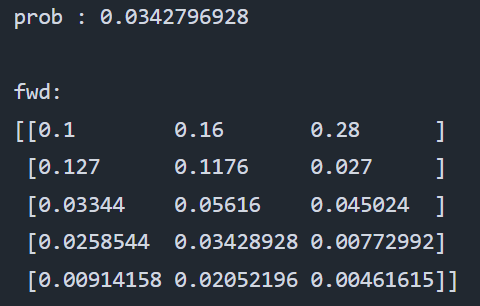

### 后向算法 （7 分）

现在我们来实现后向算法(backward algorithm)，同样地，为了避免和 `PyTorch` 里面的前向传播反向传播混淆，我们换个名字叫做`compute_likelihood_by_backward`。

In [53]:
#| exports
@patch
def compute_likelihood_by_backward(self:HiddenMarkovModel, ob):
    """HMM Backward Algorithm.

    Args:
        ob (array, with shape(T,)): (o1, o2, ..., oT), observations

    Returns:
        bwd (array, with shape(T, 3)): bwd[t, s] means full-path backward probability torwards state s at
                                        timestep t given the observation ob[t+1::]
                                        给定观察ob[t+1::]情况下t时刻到达状态s的所有可能路径的概率和
        prob: the probability of HMM model generating observations.

    """
    T = ob.shape[0]
    bwd = jnp.zeros((T, self.total_states))

    # Begin Assignment

    # 初始化 t == T-1 时刻到达各个状态的概率
    bwd = bwd.at[T - 1, :].set(1.0)

    # Induction step
    for t in reversed(range(T - 1)):
        for i in range(self.total_states):
            bwd = bwd.at[t, i].set(jnp.dot(bwd[t + 1, :] * self.B[:, ob[t + 1]], self.A[i, :]))

    # End Assignment

    prob = (bwd[0, :] * self.B[:, ob[0]] * self.pi).sum()

    return bwd, prob

In [57]:
bwd, p = model.compute_likelihood_by_backward(observations)
p, bwd


(
    Array(0.0342797, dtype=float32),
    Array([[0.06272705, 0.06416424, 0.06335969],
       [0.12735201, 0.12480801, 0.126984  ],
       [0.2536    , 0.25800002, 0.25120002],
       [0.5       , 0.51      , 0.5       ],
       [1.        , 1.        , 1.        ]], dtype=float32)
)

同样的，我们的计算结果与助教给的一致。

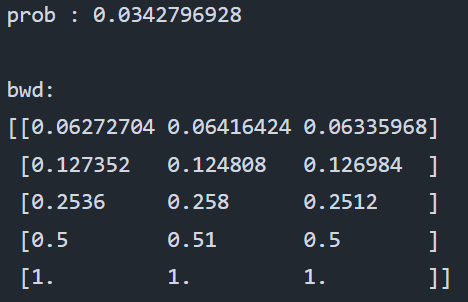

### Viterbi 解码算法 （6 分）。

现在我们来实现维特比解码算法，虽然这个算法名字`PyTorch` 的命名不冲突，但是单单一个算法名字对用户毫无作用。
我们写软件的目的就是让用户尽可能只知道API，不知道实现，Viterbi是一个实现，一个手段。我们的目的是解码。

In [60]:
#| exports
@patch
def decode_states_by_viterbi(self:HiddenMarkovModel, ob):
    """Viterbi Decoding Algorithm.

    Args:
        ob (array, with shape(T,)): (o1, o2, ..., oT), observations

    Variables:
        delta (array, with shape(T, 3)): delta[t, s] means max probability torwards state s at
                                            timestep t given the observation ob[0:t+1]
                                            给定观察ob[0:t+1]情况下t时刻到达状态s的概率最大的路径的概率
        phi (array, with shape(T, 3)): phi[t, s] means prior state s' for delta[t, s]
                                        给定观察ob[0:t+1]情况下t时刻到达状态s的概率最大的路径的t-1时刻的状态s'

    Returns:
        best_prob: the probability of the best state sequence
        best_path: the best state sequence

    """
    T = ob.shape[0]
    delta = jnp.zeros((T, self.total_states))
    #update np.int32
    phi = jnp.zeros((T, self.total_states), jnp.int32)
    best_prob, best_path = 0.0, jnp.zeros(T, dtype=jnp.int32)

    # Begin Assignment

    # 从初始状态开始
    delta = delta.at[0, :].set(self.pi * self.B[:, ob[0]])

    # 根据动态规划的公式来更新delta和phi
    for t in range(1, T):
        for j in range(self.total_states):
            d, p = max((delta[t - 1, i] * self.A[i, j] * self.B[j, ob[t]], i) for i in range(self.total_states))
            delta = delta.at[t, j].set(d)
            phi = phi.at[t, j].set(p)

    # End Assignment

    best_path = best_path.at[T-1].set(delta[T-1, :].argmax(0))
    best_prob = delta[T-1, best_path[T-1]]
    for t in reversed(range(T-1)):
        best_path = best_path.at[t].set(phi[t+1, best_path[t+1]])

    return best_prob, best_path

In [62]:
rob, path = model.decode_states_by_viterbi(observations)
rob, path

(Array(0.00259308, dtype=float32), Array([2, 0, 2, 0, 1], dtype=int32))

这与助教的结果也是一致的。

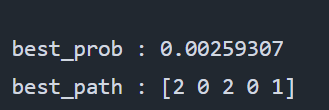

### main

In [65]:
#| exports
if __name__ == "__main__":
    model = HiddenMarkovModel()
    observations = jnp.array([0, 1, 0, 1, 1])  # [THU, PKU, THU, PKU, PKU]
    fwd, p = model.compute_likelihood_by_forward(observations)
    print(p)
    print(fwd)
    bwd, p = model.compute_likelihood_by_backward(observations)
    print(p)
    print(bwd)
    prob, path = model.decode_states_by_viterbi(observations)
    print(prob)
    print(path)

Sun 2024-12-08 08:45:58.124865

INFO     (Array(0.0342797, dtype=float32), Array([[0.1       , 0.16000001, 0.28      ],               ]8;id=299434;file:///home/ycm/repos/novelties/cv/ScholarlyInfrastructure/scholarly_infrastructure/logging/nucleus.py\nucleus.py]8;;\:]8;id=466593;file:///home/ycm/repos/novelties/cv/ScholarlyInfrastructure/scholarly_infrastructure/logging/nucleus.py#55\55]8;;\
                [0.127     , 0.11760001, 0.027     ],                                                              
                [0.03344   , 0.05616001, 0.045024  ],                                                              
                [0.0258544 , 0.03428929, 0.00772992],                                                              
                [0.00914158, 0.02052196, 0.00461615]], dtype=float32))                                             

Sun 2024-12-08 08:45:58.193458

INFO     (Array(0.0342797, dtype=float32), Array([[0.06272705, 0.06416424, 0.06335969],               ]8;id=312224;file:///home/ycm/repos/novelties/cv/ScholarlyInfrastructure/scholarly_infrastructure/logging/nucleus.py\nucleus.py]8;;\:]8;id=468162;file:///home/ycm/repos/novelties/cv/ScholarlyInfrastructure/scholarly_infrastructure/logging/nucleus.py#55\55]8;;\
                [0.12735201, 0.12480801, 0.126984  ],                                                              
                [0.2536    , 0.25800002, 0.25120002],                                                              
                [0.5       , 0.51      , 0.5       ],                                                              
                [1.        , 1.        , 1.        ]], dtype=float32))                                             

Sun 2024-12-08 08:45:58.381392

INFO     (Array(0.00259308, dtype=float32), Array([2, 0, 2, 0, 1], dtype=int32))                      ]8;id=586397;file:///home/ycm/repos/novelties/cv/ScholarlyInfrastructure/scholarly_infrastructure/logging/nucleus.py\nucleus.py]8;;\:]8;id=970949;file:///home/ycm/repos/novelties/cv/ScholarlyInfrastructure/scholarly_infrastructure/logging/nucleus.py#55\55]8;;\

## 实验任务二：基于 HMM 的强制对齐实验（30 分）

#### 成功运行 align 命令

根据助教的指导，我们成功运行了 align 命令，并得到了如下输出：

![alt text](aligner_success.jpg)


我们实验的步骤是

```bash
git clone https://github.com/thuhcsi/dpss-exp2-HM
conda create -n aligner -c conda-forge montreal-forced-aligner
conda activate aligner 
```

为了提高conda运行的速度，我们采用了 [mamba](https://mamba.readthedocs.io/en/latest/) 对conda进行了替代优化。
```bash
conda activate base

conda install -c conda-forge mamba
```


为了解压助教的数据，我们需要使用unrar

```bash
wget https://cloud.tsinghua.edu.cn/seafhttp/files/1884144c-0181-4a9a-84f4-c2cc6544ddf5/mfadir.rar
mv mfadir.rar dpss-exp2-HMM/T2-MFA/data
cd dpss-exp2-HMM/T2-MFA/data
sudo apt-get install unrar 
```



一开始我们实验并没有成功，遇到了没有见过的报错，搜不到原因。
一开始我以为是因为mamba和conda不一样，但是我查阅了 MFA的官方文档，发现mamba是[MFA软件官方推荐的安装方式](https://montreal-forced-aligner.readthedocs.io/en/latest/installation.html)。


经过助教提示，我们卸载MFA ：
```bash
conda remove -n aligner --al
rm -r ~/Documents/MFA
conda info # 查看问题
conda update -n base conda
```
更新conda到最新版本，然后重新安装MFA。虽然我的conda只比最新的差一个版本，但就是因为这个原因，第一次尝试失败了，第二次就成功了。

最终我们成功运行了
```bash
mfa align mfadir pinyin-lexicon-r-new.txt new_acoustic_model.zip output
```




#### （文本内容分析3分，结合波形、频谱、基频分析6分）分析最后生成的textgrid的文本内容，并结合音频的波形、频谱、基频进行分析。

>（用pratt或者audition之类的可以查看音频波形图的软件, pratt同时打开wav和textgrid一起选中，然后view&edit就行）

我们刚才是在课题组服务器上面运行的MFA，现在我们下载到Windows上面使用pratt软件查看音频波形图。

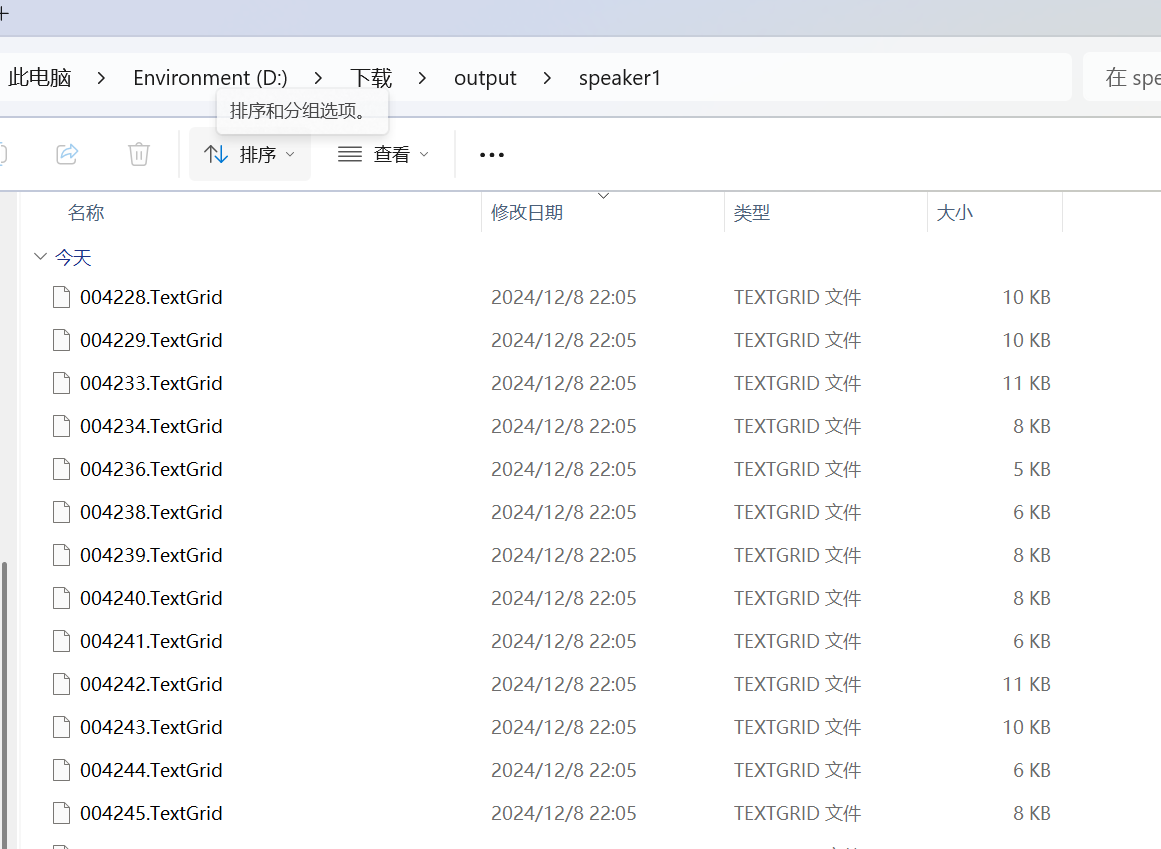


#### (3分) 如何使用HMM（隐马尔可夫模型）在MFA中进行音素对齐？


#### (3分) 在MFA中，HMM的训练过程是如何进行的，以及如何利用训练好的HMM模型进行音素级别的对齐？

#### （3分）在MFA中，如何根据HMM模型调整参数以优化音素对齐的准确性？针对所选择的参数写明理由即可，可以通过HMM模型的概念出发。

## 参考文献 References {#sec-ref-list}

::: {#refs}

:::



In [ ]:
import nbdev

In [ ]:
# | hide

nbdev.nbdev_export()